<a href="https://colab.research.google.com/github/MeryemSulkhayeva/MeryemSulkhayeva/blob/main/introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2024-05-31 10:19:19--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2024-05-31 10:19:19 (82.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [3]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-05-31 10:19:19--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-31 10:19:19 (39.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-05-31 10:19:25--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.163.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-05-31 10:19:26 (92.7 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
#Shuffle training dataframe - qarisdirmaq
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
#Balance or inbalance dataset?
train_df['target'].value_counts()
# It is balanca dataset
# 1-felaketdi

target
0    4342
1    3271
Name: count, dtype: int64

In [10]:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [11]:
#Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df) - 5)
for row in train_df_shuffled[['text', 'target']][random_index: random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 0 (not real disaster)
Text:
Crushed

---

Target: 0 (not real disaster)
Text:
'i never understood guys who wanted to run into burning buildings.'
'you chase murderers.'
'not if they're on fire.'

---

Target: 1 (real disaster)
Text:
Alleged East Bay serial arsonist arrested http://t.co/WR48AQTUm7

---

Target: 0 (not real disaster)
Text:
Ever since Kelly's burned I keep having dreams about being inside burning buildings ??

---

Target: 0 (not real disaster)
Text:
Ignition Knock (Detonation) Sensor-Senso Standard KS161 http://t.co/WadPP69LwJ http://t.co/yjTh2nABv5

---



In [12]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [14]:
train_sentences[:10], train_labels[:10]
# ilk10
# [-10:] -> (son10)
# [10:] -> (ilk 10dan sonrakilari)

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

#Converting text to numbers

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=10000,                            #how many words in the vocabulary(all of the different words in your text)
                                    standardize='lower_and_strip_punctuation',  #how to process text
                                    split='whitespace',                         #how to split tokens
                                    ngrams=None,                                #create groups of n-words?
                                    output_mode='int',                          #how to map tokens to numbers
                                    output_sequence_length=None,                #how long should the output sequence of tokens be?
                                    pad_to_max_tokens=True)                    #not valid if using max_tokens=None
# max_tokens -> en cox tkrlanan sozu gotur
# lower -> hamsini balaca ile yaz, noqte vergulu sil
# split -> her soze bosluga gore bol
# ngrams -> birlesdir sozleri
# length -> her sozun uzunlugu eyni olmalidi-limit qoyma
# lengthe qiymet vermesek pad to ist elemek olur
# tanimadigina unknown deyir-1

In [16]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [17]:
#Setup text vectorization with custom variables
max_vocab_length = 10000            #max number of words to have in our vocabulary
max_length = 15                     #max length our sequences will be(e.g. how many words from a Tweet does our model see?)
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)


In [18]:
#Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)
# adapt(fir edir)-> oyren

In [19]:
# Create sample sentences and tokenize it
sample_sentences = "There's a flood in my  street!"
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
# Choose a random sentence from the training dataset and tokenize it
random_sentences = random.choice(train_sentences)
print(f'Original text:\n{random_sentences}\
      \n\nVectorized version:')
text_vectorizer([random_sentences])

Original text:
POTUS appoints Brig. Gen. Richard G. Kaiser as member of the Mississippi River Commission. Learn more about the MRC: http://t.co/vdUKcV7YJy      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1065,    1,    1,    1, 2742, 2981,    1,   26, 3642,    6,    2,
           1,  499,    1,  944]])>

In [21]:
# Get in unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()         #lugeti elde ele
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]    #least common tokens
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [22]:
words_in_vocab

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [23]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,          #set input shape
                             output_dim=128,                      #set size of embedding vector
                             embeddings_initializer='uniform',    #default, initialize randomly
                             input_length=max_length,             #how long is each input-15
                             name='embedding_1')
embedding
# textvectorilization -> textleri reqem kimi ifade edir
# Embedding -> yaxin sozleri metrics le ifade edir ve yaxinlasdirir
# 128 vector yarat ve ifade ele
# uniform ehtimalla elaqelidi

In [24]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentences}\
      \n\nEmbedded version:')

# Embed the random sentences (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentences]))
sample_embed
# 1 cumlede 15 soz var

Original text:
POTUS appoints Brig. Gen. Richard G. Kaiser as member of the Mississippi River Commission. Learn more about the MRC: http://t.co/vdUKcV7YJy      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01658195, -0.00656649,  0.02213624, ...,  0.0331741 ,
          0.03271308,  0.04179064],
        [-0.01461973,  0.02696774, -0.04698805, ..., -0.01758679,
         -0.01760443, -0.02647343],
        [-0.01461973,  0.02696774, -0.04698805, ..., -0.01758679,
         -0.01760443, -0.02647343],
        ...,
        [-0.02423297,  0.04263696,  0.01160033, ..., -0.01459997,
         -0.01067368,  0.04363124],
        [-0.01461973,  0.02696774, -0.04698805, ..., -0.01758679,
         -0.01760443, -0.02647343],
        [-0.04332094,  0.02517802, -0.04266438, ...,  0.03157606,
         -0.01668521, -0.04807974]]], dtype=float32)>

In [25]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.01658195, -0.00656649,  0.02213624,  0.00750607, -0.01613043,
       -0.03717359,  0.01075401, -0.0338369 , -0.0187771 ,  0.03670016,
       -0.03420521, -0.01769161, -0.02041519, -0.01006754, -0.03800008,
       -0.044827  ,  0.03146166, -0.04695424,  0.00913906,  0.01346805,
       -0.01016635,  0.0145591 ,  0.00735763,  0.01781404, -0.04859025,
       -0.0332207 ,  0.01998372, -0.04280793,  0.01847745, -0.03443465,
        0.01523087, -0.01372067,  0.02725292, -0.04810684, -0.01995412,
        0.01571452, -0.01006259,  0.00222667,  0.03508769, -0.01194974,
       -0.01708051, -0.03292032,  0.037849  , -0.00033145, -0.00346887,
        0.03896957,  0.01894926, -0.00205602,  0.0358764 , -0.0101903 ,
        0.03327645,  0.02529143,  0.00226867, -0.0172445 ,  0.0334806 ,
        0.01400297,  0.02964995,  0.047844  ,  0.03000835,  0.01882804,
        0.00571344, -0.04924802, -0.03285489,  0.00922966, -0.02404526,
        0.024278

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
#Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

# naive modele elaqeler maraqli deyil

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}')

Our baseline model achieves an accuracy of: 79.27


In [28]:
#make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [29]:
model_0.predict(['earthquake didnt happen'])

array([1])

In [30]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy , precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1 score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _= precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [32]:
calculate_results

<function __main__.calculate_results(y_true, y_pred)>

In [33]:
baseline_results = calculate_results(y_true = val_labels,
                                     y_pred = baseline_preds)
baseline_results
# precision-dediklerinin 81 faizi duzdu
# recall-felaketlerin 79 faizini duz tapib

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

#Model 1: A simple dense model

In [34]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [35]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [36]:
#Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [37]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [38]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240531-101931
Epoch 1/5
215/215 [==============================] - 11s 39ms/step - loss: 0.6119 - accuracy: 0.6929 - val_loss: 0.5377 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.4429 - accuracy: 0.8186 - val_loss: 0.4695 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3478 - accuracy: 0.8599 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 8s 36ms/step - loss: 0.2863 - accuracy: 0.8913 - val_loss: 0.4638 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2394 - accuracy: 0.9115 - val_loss: 0.4761 - val_accuracy: 0.7874


In [39]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7874


[0.47609004378318787, 0.787401556968689]

In [40]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.01266053, -0.05609482, -0.0186007 , ..., -0.05676078,
         -0.03137051,  0.02394629],
        [-0.0092842 ,  0.02449905, -0.05200306, ..., -0.02332153,
         -0.0133326 , -0.03098415],
        [ 0.06535244,  0.00335408,  0.02904136, ..., -0.03712473,
         -0.00777651, -0.01819783],
        ...,
        [ 0.01392155, -0.01546122,  0.03422195, ...,  0.02179767,
          0.0117175 ,  0.00704219],
        [ 0.04887618, -0.02312211,  0.010738  , ..., -0.07243236,
          0.05223023, -0.04566504],
        [ 0.07197513, -0.07993167, -0.11109161, ..., -0.10980636,
          0.10851358, -0.10787383]], dtype=float32)>]

In [41]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [42]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.41548753],
       [0.7470102 ],
       [0.9976981 ],
       [0.11275872],
       [0.10655697],
       [0.93488437],
       [0.91349185],
       [0.9926924 ],
       [0.9687709 ],
       [0.26920548]], dtype=float32)

In [43]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [44]:
#Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497,
 'f1': 0.7846966492209201}

In [45]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [46]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline{key}: {value:.2f}, New{key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baselineaccuracy: 79.27, Newaccuracy: 78.74, Difference: -0.52
Baselineprecision: 0.81, Newprecision: 0.79, Difference: -0.02
Baselinerecall: 0.79, Newrecall: 0.79, Difference: -0.01
Baselinef1: 0.79, Newf1: 0.78, Difference: -0.00


#Visualizing learned embeddings

In [47]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [48]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [49]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [50]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model 2: LSTM

In [51]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1,), dtype = tf.string)

x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
x = layers.LSTM(units = 64, return_sequences = True)(x)
#print(x.shape)
x = layers.LSTM(units = 64)(x)
#print(x.shape)
x = layers.Dense(64, activation = 'relu')(x)

outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'Model_2_LSTM')

In [52]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [53]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [54]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240531-102016
Epoch 1/5
215/215 [==============================] - 17s 46ms/step - loss: 0.2178 - accuracy: 0.9250 - val_loss: 0.5401 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.1651 - accuracy: 0.9400 - val_loss: 0.6051 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 9s 43ms/step - loss: 0.1298 - accuracy: 0.9517 - val_loss: 0.7478 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 9s 42ms/step - loss: 0.1099 - accuracy: 0.9588 - val_loss: 0.8727 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0831 - accuracy: 0.9642 - val_loss: 0.9767 - val_accuracy: 0.7743


In [55]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 9ms/step


array([[1.1008903e-02],
       [4.9928248e-01],
       [9.9984878e-01],
       [4.3641556e-02],
       [2.2144985e-05],
       [9.9705231e-01],
       [9.3428063e-01],
       [9.9991786e-01],
       [9.9977142e-01],
       [3.9110044e-01]], dtype=float32)

In [56]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [57]:
model_2_results = calculate_results(y_true = val_labels,
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 0.7790421904139229,
 'recall': 0.7742782152230971,
 'f1': 0.77094690659836}

#Model 3:GRU

In [58]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences= True)(x)
x = layers.LSTM(64, return_sequences= True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

In [59]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [60]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [61]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240531-102147
Epoch 1/5
215/215 [==============================] - 20s 54ms/step - loss: 0.1409 - accuracy: 0.9534 - val_loss: 0.7377 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.0792 - accuracy: 0.9695 - val_loss: 1.0061 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 10s 44ms/step - loss: 0.0636 - accuracy: 0.9712 - val_loss: 1.3499 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0604 - accuracy: 0.9733 - val_loss: 1.2680 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0548 - accuracy: 0.9723 - val_loss: 1.2211 - val_accuracy: 0.7717


In [62]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 2s 8ms/step


array([[2.5237193e-02],
       [6.4226794e-01],
       [9.9995536e-01],
       [8.4522158e-02],
       [1.2863884e-05],
       [9.9889648e-01],
       [9.9685937e-01],
       [9.9994963e-01],
       [9.9994975e-01],
       [3.8877249e-01]], dtype=float32)

In [63]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [64]:
model_3_results = calculate_results(y_true = val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7732961359962456,
 'recall': 0.7716535433070866,
 'f1': 0.7695827090439606}

#Model 4: Bidirectional

In [65]:
from tensorflow.keras import layers

inputs = layers.Input(shape = (1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name = 'model_4_bidirectional')

In [66]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [67]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'])

In [68]:
model_4_history = model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'model_4_bidirectional')]
)

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240531-102252
Epoch 1/5
215/215 [==============================] - 14s 45ms/step - loss: 0.1225 - accuracy: 0.9620 - val_loss: 0.8457 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0594 - accuracy: 0.9730 - val_loss: 1.1342 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0480 - accuracy: 0.9768 - val_loss: 1.3482 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0445 - accuracy: 0.9780 - val_loss: 1.2576 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0412 - accuracy: 0.9785 - val_loss: 1.6949 - val_accuracy: 0.7638


In [69]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 6ms/step


array([[3.1481200e-01],
       [9.4593775e-01],
       [9.9998707e-01],
       [2.0529301e-01],
       [8.0269929e-06],
       [9.9997669e-01],
       [9.9988836e-01],
       [9.9999356e-01],
       [9.9998707e-01],
       [9.9948603e-01]], dtype=float32)

In [70]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
model_4_results = calculate_results(y_true = val_labels, y_pred = model_4_preds)
model_4_results

{'accuracy': 76.37795275590551,
 'precision': 0.7643277930049522,
 'recall': 0.7637795275590551,
 'f1': 0.7639693943467709}

In [72]:
embedding_test = embedding(text_vectorizer(['This is a test sentence']))
conv_1d = layers.Conv1D(
    filters = 32,
    kernel_size = 5,
    activation = 'relu',
    padding = 'valid'
)
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.02876748, 0.04983806, 0.07861643, 0.07906874, 0.03019269,
        0.02102354, 0.08889882, 0.02289722, 0.05720868, 0.00096723,
        0.0406076 , 0.02750514, 0.06361349, 0.05008789, 0.05543506,
        0.0496802 , 0.05922656, 0.02480209, 0.04848187, 0.04473333,
        0.07791574, 0.00653302, 0.06982026, 0.01240723, 0.02505554,
        0.        , 0.02734527, 0.0560694 , 0.00396217, 0.00070064,
        0.03472957, 0.07354058]], dtype=float32)>

In [73]:
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

#Model 5:GlobalMaxPool1D

In [74]:
inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size = 5, strides = 1, activation = 'relu', padding = 'valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [75]:
model_5_history = model_5.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(SAVE_DIR, 'Conv1D')]
)

Saving TensorBoard log files to: model_logs/Conv1D/20240531-102419
Epoch 1/5
215/215 [==============================] - 6s 24ms/step - loss: 0.1329 - accuracy: 0.9583 - val_loss: 0.8211 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.0791 - accuracy: 0.9711 - val_loss: 0.9965 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 6s 30ms/step - loss: 0.0649 - accuracy: 0.9746 - val_loss: 1.0642 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0573 - accuracy: 0.9765 - val_loss: 1.1380 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0521 - accuracy: 0.9774 - val_loss: 1.1923 - val_accuracy: 0.7717


In [76]:
model_5_pred_prob = model_5.predict(val_sentences)
model_5_pred_prob[:10]

24/24 [==============================] - 0s 4ms/step


array([[2.1762775e-01],
       [6.4216459e-01],
       [9.9993300e-01],
       [6.3156106e-02],
       [3.0824910e-07],
       [9.9487734e-01],
       [9.8558289e-01],
       [9.9996001e-01],
       [9.9999917e-01],
       [8.5650915e-01]], dtype=float32)

In [77]:
model_5_preds = tf.round(tf.squeeze(model_5_pred_prob))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [78]:
model_5_results = calculate_results(y_true = val_labels, y_pred = model_5_preds)
model_5_results

{'accuracy': 77.16535433070865,
 'precision': 0.773049502603257,
 'recall': 0.7716535433070866,
 'f1': 0.7697096359746837}

In [79]:
# psa - sixir

# Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [80]:
sample_sentence = 'We are live in London'

In [81]:
import tensorflow_hub as hub
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4') #load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                       'When youn call the universal sentence encoder on a sentence, it turns it into numbers.'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01240046  0.00970216  0.03828484 -0.0334167   0.05513761 -0.05974386
  0.03136371 -0.0505948   0.00356886 -0.0899643   0.01451049  0.03612753
  0.04173587  0.09476019 -0.03059291 -0.04031764 -0.0125042  -0.0167442
 -0.02803846 -0.01933671  0.01067711 -0.05709531  0.0231988  -0.00232277
 -0.05020025  0.00924426  0.006769   -0.01089597 -0.01603893  0.01578632
  0.00396918 -0.01240207  0.02607048  0.04411226 -0.06798874 -0.03951403
  0.04495441 -0.00011251  0.03986591 -0.01740059 -0.00678071  0.06433623
 -0.00150852  0.05719729  0.00805089 -0.01070052 -0.00873092  0.04481629
 -0.03078273  0.01643331], shape=(50,), dtype=float32)


In [82]:
sample_sentence

'We are live in London'

In [83]:
embed_samples[0].shape

TensorShape([512])

In [84]:
#We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],       #shape of inputs coming to our model
                                        dtype=tf.string,      #data type of inputs coming to the USE layer
                                        trainable=False,      #keep the pretrained weights
                                        name='USE')

In [85]:
#Create model using the Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

#Compile model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [86]:
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240531-102526
Epoch 1/5
215/215 [==============================] - 6s 14ms/step - loss: 0.5073 - accuracy: 0.7840 - val_loss: 0.4465 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4152 - accuracy: 0.8145 - val_loss: 0.4350 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4003 - accuracy: 0.8210 - val_loss: 0.4308 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3930 - accuracy: 0.8264 - val_loss: 0.4260 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3868 - accuracy: 0.8286 - val_loss: 0.4274 - val_accuracy: 0.8150


In [87]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.15387613],
       [0.7362744 ],
       [0.98840064],
       [0.21513665],
       [0.7503422 ],
       [0.6782038 ],
       [0.98096573],
       [0.97800666],
       [0.9301601 ],
       [0.08797068]], dtype=float32)

In [88]:
model_6_preds  =tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598,
 'f1': 0.8134357776936025}

In [90]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [91]:
compare_baseline_to_new_results(baseline_results, model_6_results)

Baselineaccuracy: 79.27, Newaccuracy: 81.50, Difference: 2.23
Baselineprecision: 0.81, Newprecision: 0.82, Difference: 0.01
Baselinerecall: 0.79, Newrecall: 0.81, Difference: 0.02
Baselinef1: 0.79, Newf1: 0.81, Difference: 0.03


#Model 7: Clone

In [92]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [93]:
print(f'Total training examples: {len(train_sentences)}')
print(f'Length of 10% training examples: {len(train_sentences_10_percent)}')

Total training examples: 6851
Length of 10% training examples: 686


In [94]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

In [95]:
#Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)
# layer kopyalayir, model kopyalamir

#Compile model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [96]:
model_7.history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, '10_percent_tf_hub_sentences_encoder')])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentences_encoder/20240531-102551
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6611 - accuracy: 0.7055 - val_loss: 0.6437 - val_accuracy: 0.6522
Epoch 2/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5858 - accuracy: 0.7901 - val_loss: 0.5909 - val_accuracy: 0.7231
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5119 - accuracy: 0.8251 - val_loss: 0.5392 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4498 - accuracy: 0.8426 - val_loss: 0.5064 - val_accuracy: 0.7703
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4078 - accuracy: 0.8411 - val_loss: 0.4905 - val_accuracy: 0.7808


In [97]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.27012795],
       [0.7880143 ],
       [0.8954306 ],
       [0.26825663],
       [0.5748209 ],
       [0.8215188 ],
       [0.7915107 ],
       [0.831104  ],
       [0.80772275],
       [0.09793767]], dtype=float32)

In [98]:
model_7_preds = tf.round(tf.squeeze(model_7_pred_probs))
model_7_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [99]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7848699684611963,
 'recall': 0.7808398950131233,
 'f1': 0.7779792730264676}

In [100]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'0_baseline_results': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_lstm': model_2_results,
                                  '3_gru': model_3_results,
                                  '4_bidirectional': model_4_results,
                                  '5_conv1D': model_5_results,
                                  '6_tf_hub_use_encoder': model_6_results,
                                  '7_th_hub_use_encoder': model_7_results})
all_model_results = all_model_results.T

In [101]:
all_model_results['accuracy'] = all_model_results['accuracy'] / 100
all_model_results

,accuracy,precision,recall,f1
0_baseline_results,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.787402,0.791492,0.787402,0.784697
2_lstm,0.774278,0.779042,0.774278,0.770947
3_gru,0.771654,0.773296,0.771654,0.769583
4_bidirectional,0.763780,0.764328,0.763780,0.763969
5_conv1D,0.771654,0.773050,0.771654,0.769710
6_tf_hub_use_encoder,0.814961,0.817255,0.814961,0.813436
7_th_hub_use_encoder,0.780840,0.784870,0.780840,0.777979


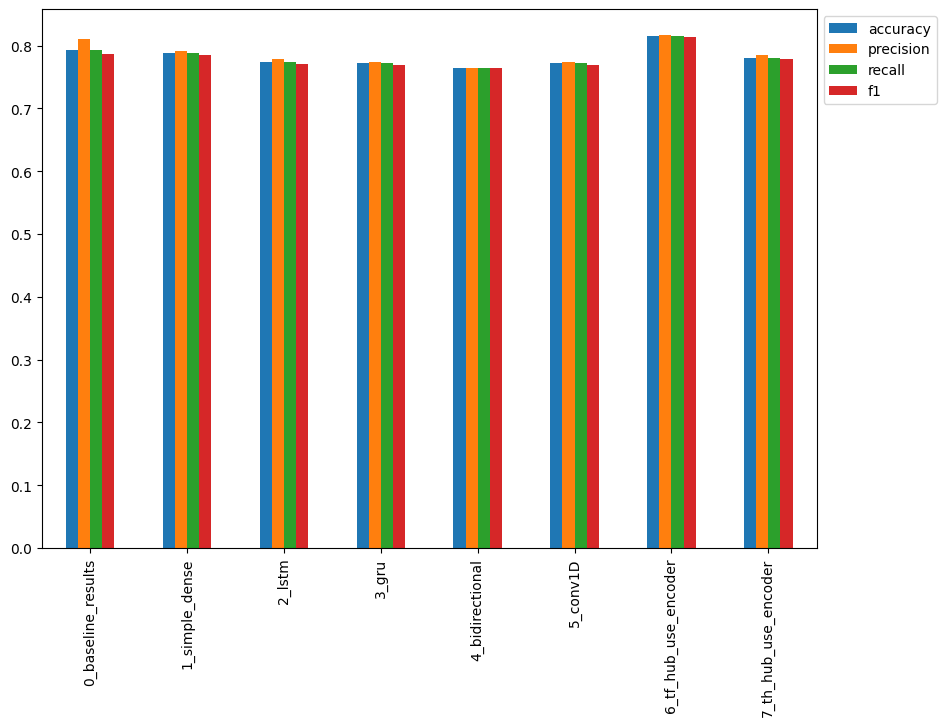

In [102]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

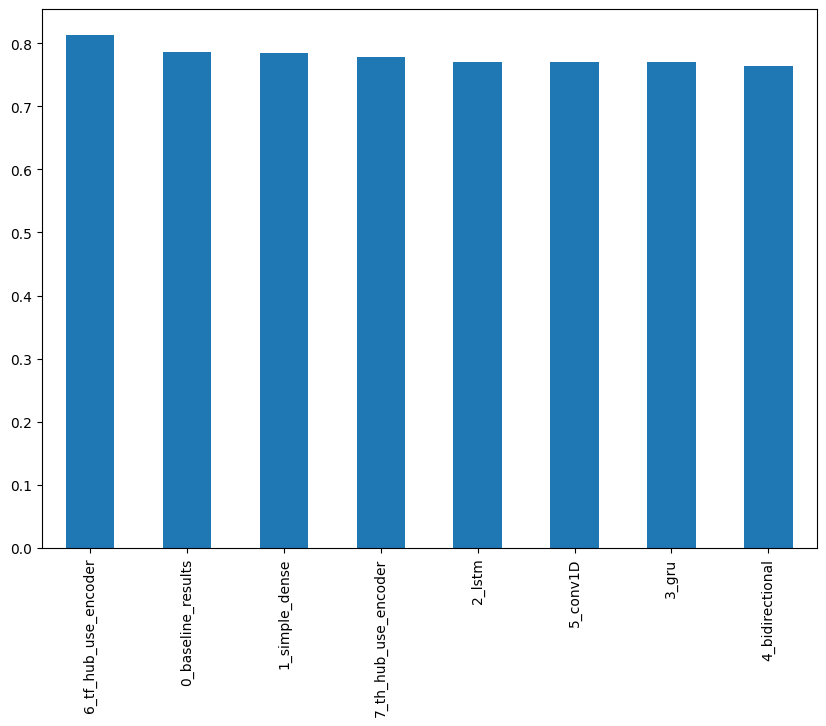

In [103]:
# Sort model results by f1-score
all_model_results.sort_values('f1', ascending=False)['f1'].plot(kind='bar', figsize=(10, 7));

In [104]:
#Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]
# predict var deye soft votingdi - ensemble

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

#Saving and loading a training model

In [105]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save('model_6.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [106]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer': hub.KerasLayer})
# h1 uzantisindan istifade edende custom layerleri yazmaq lazimdi(hub.keraslayer-universal-sentence-encoder)
# h5 uzantisindan istifade edende custom layerleri yazmaga ehtiyac yoxdur

In [107]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4274 - accuracy: 0.8150


[0.4273874759674072, 0.8149606585502625]

In [108]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [109]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model('model_6_SavedModel_format')

In [110]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 13ms/step - loss: 0.4274 - accuracy: 0.8150


[0.4273874759674072, 0.8149606585502625]

# Finding the most wrong examples

In [111]:
#Create fataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_preds,
                       'pred_prob': tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.153876
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.736274
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988401
3,@camilacabello97 Internally and externally scr...,1,0.0,0.215137
4,Radiation emergency #preparedness starts with ...,1,1.0,0.750342


In [112]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.909360
759,FedEx will no longer transport bioterror patho...,0,1.0,0.864144
628,@noah_anyname That's where the concentration c...,0,1.0,0.854128
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.850442
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.841346
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.812674
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.803620
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.789083
144,The Sound of Arson,0,1.0,0.784698
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.765506


In [113]:
# Check the false positives (model predicted 1 when should've been 0)  -  model felaketdi deyib lakin eslinde faleket deyil
for row in most_wrong[:10].itertuples():  #itertuples-tuple ustunde bir bir get - ilk 10
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text:\n{text}\n')
  print(f'----\n')

Target: 0, Pred: 1, Prob: 0.9093597531318665
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.8641439080238342
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8541281819343567
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8504421710968018
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8413455486297607
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.812674343585968
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pro

In [114]:
# Check the most wrong false negatives(model predicted 0 when should've been predict 1) - model felaket deyil deyib lakin eslinde faleketdi
for row in most_wrong[-10:].itertuples():  #son 10
  _, text, target, pred, prob = row
  print(f'Target: {target}, Pred: {int(pred)}, Prob: {prob}')
  print(f'Text:\n{text}\n')
  print(f'----\n')

Target: 1, Pred: 0, Prob: 0.06611990928649902
Text:
Next May I'll be free...from school from obligations like family.... Best of all that damn curfew...

----

Target: 1, Pred: 0, Prob: 0.0637144148349762
Text:
'The way you move is like a full on rainstorm and I'm a house of cards'

----

Target: 1, Pred: 0, Prob: 0.06078343465924263
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 0.05473566800355911
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0, Prob: 0.05118401348590851
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0, Prob: 0.04545195400714874
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 0.040598347783088684
Text

# Make predictions on the test dataset

In [115]:
# Making predictions on the test dataset
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) #has to be list
  pred = tf.round(pred_prob)
  print(f'Pred: {int(pred)}, Prob: {pred_prob}')
  print(f'Text:\n{test_sample}\n')
  print('----\n')

1/1 [==============================] - 0s 63ms/step
Pred: 0, Prob: 0.22868283092975616
Text:
@Wadeycakes @ThunderCastTV you're right Thunder would obliterate you #HEYOOO

----

1/1 [==============================] - 0s 49ms/step
Pred: 0, Prob: 0.039933640509843826
Text:
Join me on FB for #Sneak #Peek Friday http://t.co/3DK5zyYQ1F for my upcoming #novel To Reap a Whirlwind #fiction #historical #wip #amwriting

----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.0735098198056221
Text:
@Robot_Rainstorm I'm interested.  Is it through Yahoo?

----

1/1 [==============================] - 0s 45ms/step
Pred: 0, Prob: 0.33029869198799133
Text:
02 03 04 05 AVALANCHE 1500 REAR AXLE ASSEMBLY 2055271 http://t.co/VxZhZsAlra http://t.co/HmXWRkbLS0

----

1/1 [==============================] - 0s 43ms/step
Pred: 1, Prob: 0.611233651638031
Text:
the fires of hell for Julie #Extant writers....she better go down in flames when this is all over...#Extant

----

1/1 [================